In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import Homework4

# Task 1

In [6]:
# Example for undergraduate catalog
undergrad_pages = Homework4.get_subpages("https://catalog.northeastern.edu/undergraduate/computer-information-science/")
grad_pages = Homework4.get_subpages("https://catalog.northeastern.edu/graduate/computer-information-science/")
all_pages = undergrad_pages + grad_pages

/undergraduate/computer-information-science/computer-science/
/undergraduate/computer-information-science/computer-science/bscs/
/undergraduate/computer-information-science/computer-science/bacs/
/undergraduate/computer-information-science/computer-science/computing-law-bs/
/undergraduate/computer-information-science/computer-science/interdisciplinary-studies-bs/
/undergraduate/computer-information-science/computer-science/minor/
/undergraduate/computer-information-science/computer-science/bscs/
/undergraduate/computer-information-science/computer-science/bacs/
/undergraduate/computer-information-science/computer-science/computing-law-bs/
/undergraduate/computer-information-science/computer-science/interdisciplinary-studies-bs/index.html
/undergraduate/computer-information-science/computer-science/minor/
/undergraduate/computer-information-science/cybersecurity/
/undergraduate/computer-information-science/cybersecurity/cybersecurity-bs/
/undergraduate/computer-information-science/cyber

# Task 2

In [7]:
# Display content for "Computer Science, Minor"
for page in all_pages:
    if "computer-science/minor" in page['url']:
        print(page['url'])  # Check if the URL contains the minor path
        print(page['content'])
        break

https://catalog.northeastern.edu/undergraduate/computer-information-science/computer-science/minor/
  * Overview
  * Minor Requirements

A computer science minor is designed to provide the computer science skills
and know-how you need to succeed in today’s highly digital world. A minor
requires completion of five CS courses—more than enough to gain proficiency
while easily fitting around your major requirements. No prior programming
experience is needed.

Looking to gain technical knowledge that directly applies to your major?
Students have the option to pursue a Khoury meaningful minor.

_Note:_ Khoury minors are only available to non–Khoury majors; students in
Khoury-only or Khoury-combined degrees are not eligible for Khoury minors. A
student may receive at most one Khoury minor, regardless of how many Khoury
minors they qualify for.​

Complete all courses listed below unless otherwise indicated. Also complete
any corequisite labs, recitations, clinicals, or tools courses where
spec

In [8]:
for page in all_pages:
    page['content'] = Homework4.clean_content(page['content'])

for page in all_pages:
    if "computer-science/bscs" in page['url']:
        print(page['url'])  # Check if the URL contains the minor path
        print(page['content'])
        break

https://catalog.northeastern.edu/undergraduate/computer-information-science/computer-science/bscs/
  * Overview
  * Program Requirements
  * Plan of Study
The Bachelor of Science in Computer Science focuses on the fundamentals of
program design, software development, computer organization, systems and
networks, theories of computation, principles of languages, and advanced
algorithms and data.
* * *
  * Concentrations and course offerings may vary by campus and/or by program modality. Please consult with your advisor or admissions coach for the course availability each term at your campus or within your program modality.
  * Certain options within the program may be  _required_ at certain campuses or for certain program modalities. Please consult with your advisor or admissions coach for requirements at your campus or for your program modality. 
* * *
Complete all courses listed below unless otherwise indicated. Also complete
any corequisite labs, recitations, clinicals, or tools cours

# Task 3

In [16]:
# Apply clean up function
for page in all_pages:
    page['content'] = Homework4.clean_content(page['content'])

# Convert content sections to vectors and cluster
sections = [section for page in all_pages for section in page['content'].split("## ")]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sections)

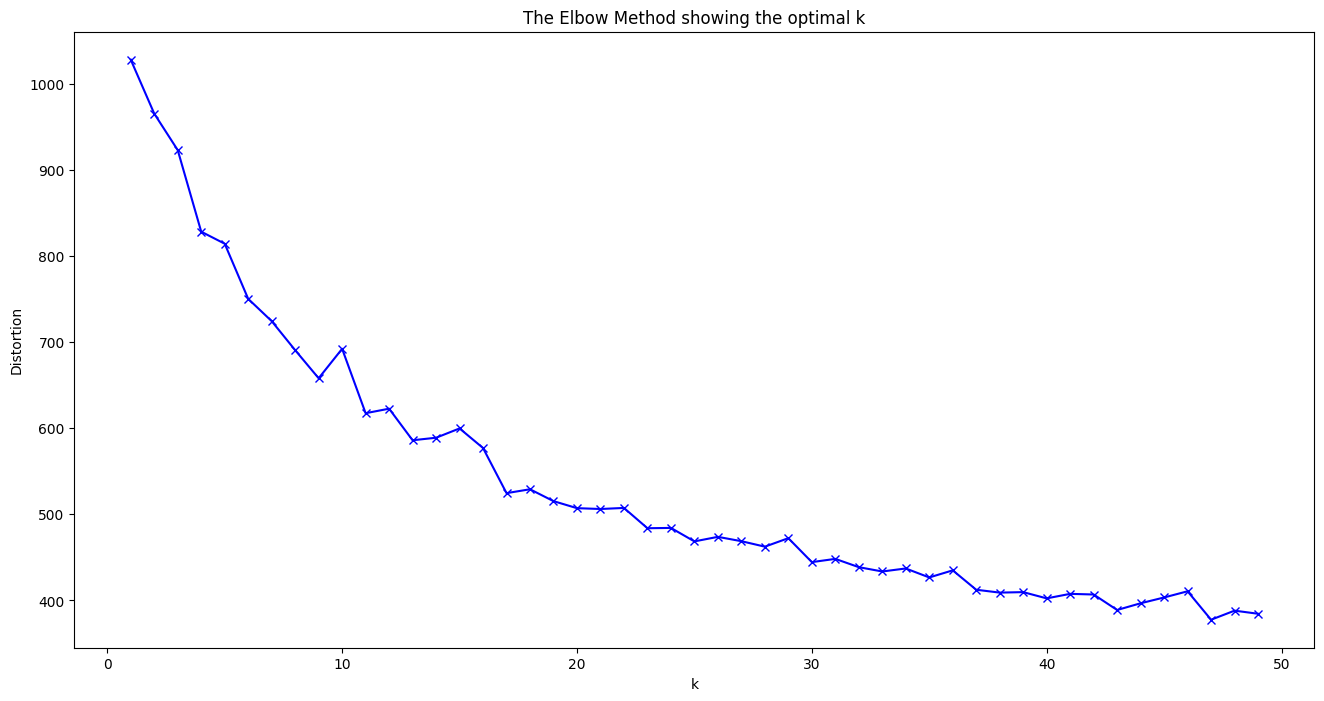

In [18]:
# elbow method to find the optimal number of clusters
distortions = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
# Use KMeans for clustering similar sections
n_clusters = 20  # Adjust based on content size
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Display top 20 most similar sections
kmeans_df = pd.DataFrame
for i in range(n_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    if len(cluster_indices) > 1:  # Only show clusters with potential duplicates
        print(f"Cluster {i}:")
        # Display top 20 most similar sections in a readable format, sorted
        cluster_similarities = []
        for idx in cluster_indices:
            similarity = np.linalg.norm(X[idx].toarray() - kmeans.cluster_centers_[i])
            cluster_similarities.append((idx, similarity))
        cluster_similarities.sort(key=lambda x: x[1])
        for idx, similarity in cluster_similarities[:20]:
            print(f"Similarity: {similarity:.2f}")
            print(sections[idx])
            print()

Cluster 0:
Similarity: 0.00
Universitywide Requirements
All undergraduate students are required to complete the [Universitywide
Requirements](/undergraduate/university-academics/university-wide-
requirements/).


Similarity: 0.00
Universitywide Requirements
All undergraduate students are required to complete the [Universitywide
Requirements](/undergraduate/university-academics/university-wide-
requirements/).


Similarity: 0.00
Universitywide Requirements
All undergraduate students are required to complete the [Universitywide
Requirements](/undergraduate/university-academics/university-wide-
requirements/).


Similarity: 0.00
Universitywide Requirements
All undergraduate students are required to complete the [Universitywide
Requirements](/undergraduate/university-academics/university-wide-
requirements/).


Similarity: 0.00
Universitywide Requirements
All undergraduate students are required to complete the [Universitywide
Requirements](/undergraduate/university-academics/university-wid

In [30]:
# specify clusters to remove
clusters_to_remove = [0, 8, 14]

# remove sections from the specified clusters
all_pages_cleaned = []
for page in all_pages:
    content = page['content']
    cleaned_content = ""
    for section in content.split("## "):
        vector = vectorizer.transform([section])
        cluster = kmeans.predict(vector)
        if cluster not in clusters_to_remove:
            cleaned_content += f"## {section}"
    page['content'] = cleaned_content
    all_pages_cleaned.append(page)
    
# Display content for "Computer Science, Minor"
for page in all_pages_cleaned:
    if "computer-science/minor" in page['url']:
        print(page['url'])  # Check if the URL contains the minor path
        print(page['content'])
        break

https://catalog.northeastern.edu/undergraduate/computer-information-science/computer-science/minor/
## ##   * Overview
  * Minor Requirements
A computer science minor is designed to provide the computer science skills
and know-how you need to succeed in today’s highly digital world. A minor
requires completion of five CS courses—more than enough to gain proficiency
while easily fitting around your major requirements. No prior programming
experience is needed.
Looking to gain technical knowledge that directly applies to your major?
Students have the option to pursue a Khoury meaningful minor.
_Note:_ Khoury minors are only available to non–Khoury majors; students in
Khoury-only or Khoury-combined degrees are not eligible for Khoury minors. A
student may receive at most one Khoury minor, regardless of how many Khoury
minors they qualify for.​
Complete all courses listed below unless otherwise indicated. Also complete
any corequisite labs, recitations, clinicals, or tools courses where
sp

# Task 4

In [34]:
# Save the post-processed content as a DataFrame
df = pd.DataFrame(all_pages_cleaned)
df.to_parquet("processed_catalog_data.parquet")

# Task 5

# Task 6